In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=1000, noise=0.08, random_state=101)

<Axes: >

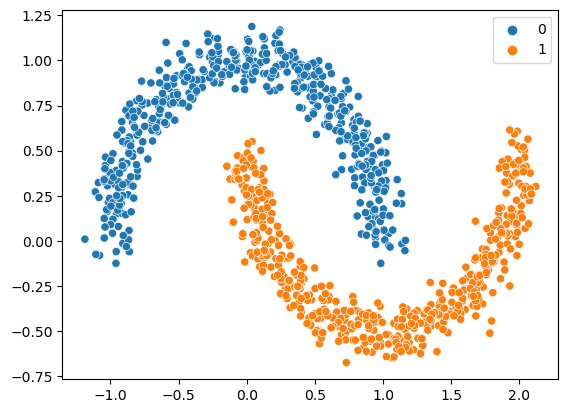

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [4]:
from sklearn.cluster import KMeans, DBSCAN
km = KMeans(n_clusters=2, n_init='auto')

In [5]:
km.fit(X)

KMeans(n_clusters=2, n_init='auto')

<Axes: >

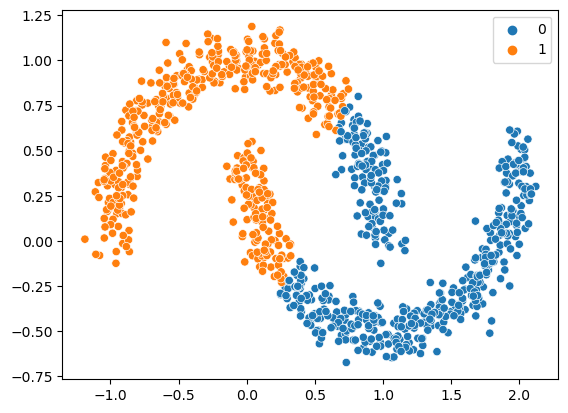

In [6]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=km.labels_)

In [7]:
dbscan = DBSCAN(n_jobs=-1, eps=0.1, min_samples=5)

dbscan.fit(X)

DBSCAN(eps=0.1, n_jobs=-1)

<Axes: >

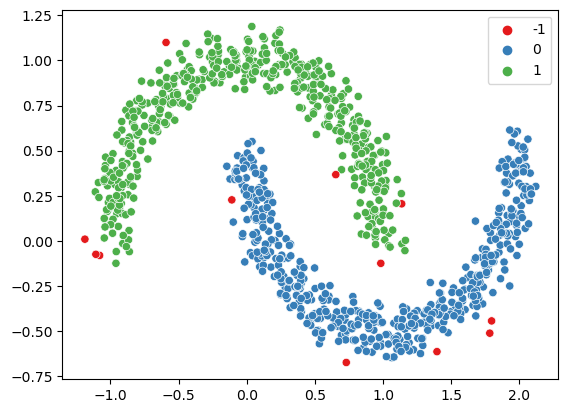

In [8]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan.labels_, palette='Set1')

<Axes: >

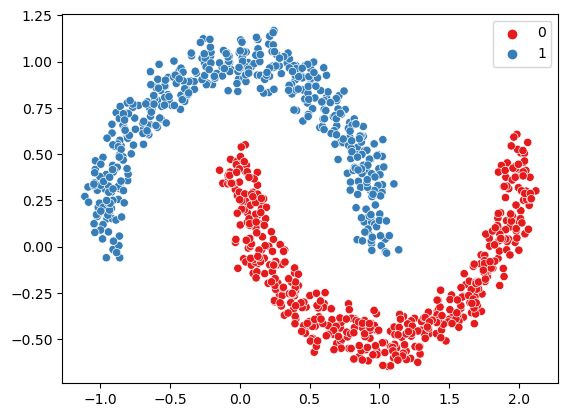

In [9]:
sns.scatterplot(x=dbscan.components_[:,0], y=dbscan.components_[:,1], hue=dbscan.labels_[dbscan.core_sample_indices_],  palette='Set1')

In [10]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

knn.fit(dbscan.components_ , dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [11]:
X_topredict, y_topredict = make_moons(n_samples=150, noise=0.08, random_state=101)

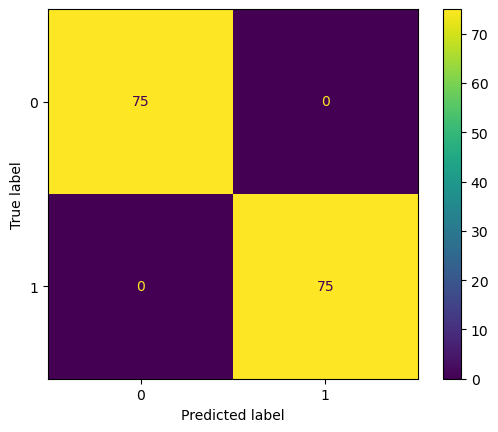

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay(None).from_predictions(y_true= 1- y_topredict, y_pred=knn.predict(X_topredict))

In [13]:
y_dist, y_idx = knn.kneighbors(X_topredict , n_neighbors=50)

In [14]:
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_idx]

In [15]:
from scipy.stats import mode 
y_pred , _ = mode(y_pred, axis=1)

/tmp/ipykernel_28916/3370841241.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred , _ = mode(y_pred, axis=1)


In [21]:
y_pred[(y_dist > 0.05).all(axis=1)] = -1

<Axes: >

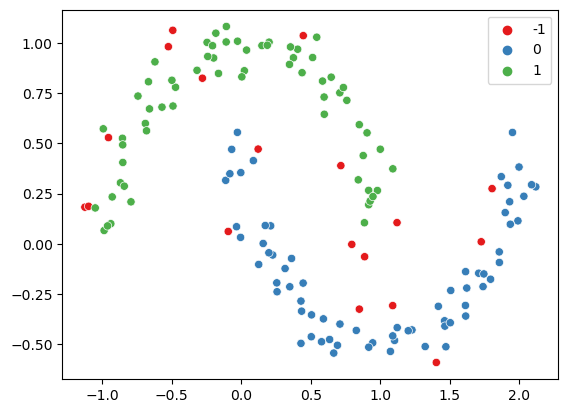

In [22]:
sns.scatterplot(x=X_topredict[:,0], y=X_topredict[:,1], hue=y_pred.ravel(),  palette='Set1')